## Libraries

In [1]:
import rawpy as rw
import numpy as  np
from Contents.params import*
from Contents.utilities import remove_out_layers, extract_RGB, united
from Contents.bayer_mask import bayer_mask
from Contents.normalization import normalization
from Contents.demosaicing import demosaicing_bayer_bilinear
from Contents.automatic_white_balance import automatic_white_balance
from Contents.gamma_correction import gamma_correction
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator

## Reading the raw image

In [2]:
with rw.imread('Images/scene_raw.CR2.dng') as raw:
    CFA = raw.raw_image_visible.copy()
    CFA_colors = raw.raw_colors_visible.copy()
    color_desc = raw.color_desc
    size = raw.sizes

In [3]:
color_desc

b'RGBG'

In [4]:
size

ImageSizes(raw_height=2622, raw_width=3948, height=2602, width=3906, top_margin=18, left_margin=42, iheight=2602, iwidth=3906, pixel_aspect=1.0, flip=0)

## Bayer Mask

In [5]:
dict_bayer_mask = bayer_mask(
    CFA_colors = CFA_colors, 
    color_desc = color_desc)

## Normalization

In [6]:
CFA_norm = normalization(
    CFA = CFA,
    dict_bayer_mask = dict_bayer_mask,
    white_level_per_channel = white_level_per_channel,
    black_level_per_channel = black_level_per_channel
)

## Extract RGB

In [7]:
CFA_R, CFA_G, CFA_B = extract_RGB(CFA_norm, dict_bayer_mask)

CFA_R = CFA_R.astype(int)
CFA_G = CFA_G.astype(int)
CFA_B = CFA_B.astype(int)

CFA_RGB = united(CFA_R, CFA_G, CFA_B).astype(int)

## Plotting Raw Data

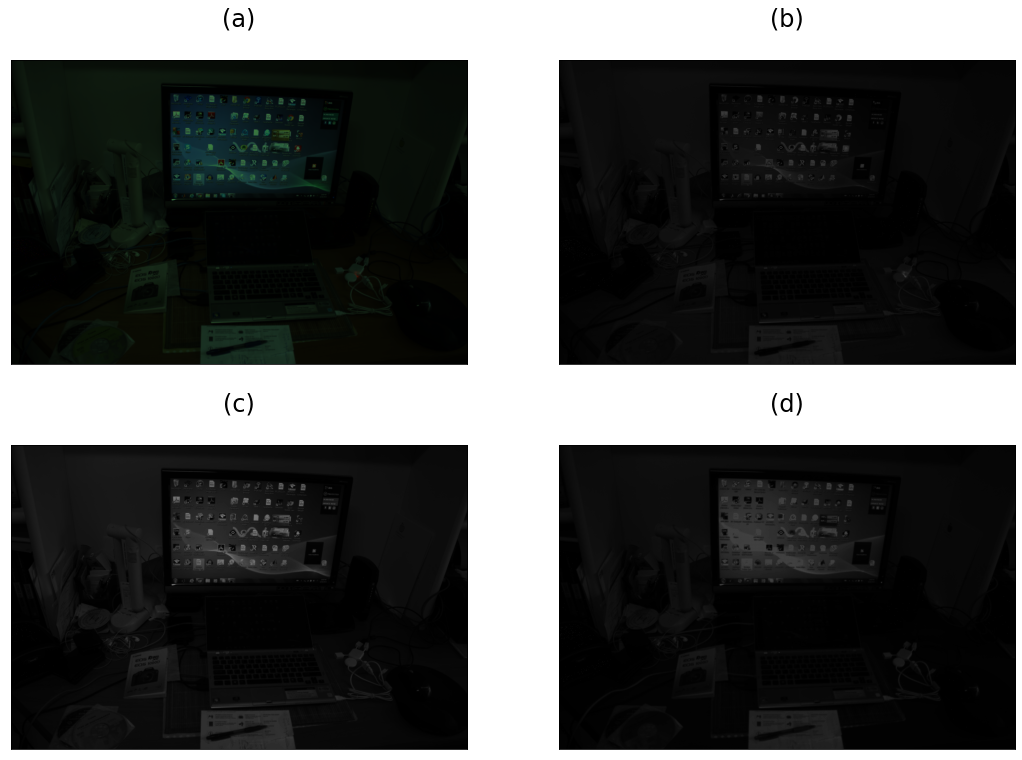

In [8]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(CFA_RGB)
axs[0][1].imshow(CFA_R, cmap = 'gray')
axs[1][0].imshow(CFA_G, cmap = 'gray')
axs[1][1].imshow(CFA_B, cmap = 'gray')

titles = [['(a)\n', '(b)\n'], ['(c)\n', '(d)\n']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig('Images/Raw_image.png');

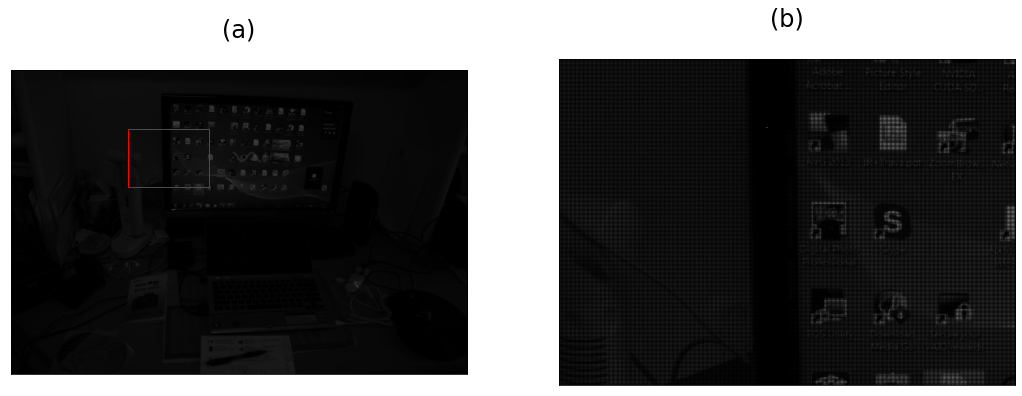

In [9]:
fig, axs = plt.subplots(1,2, figsize = (18,6))

axs[0].imshow(CFA_R, cmap = 'gray')

rect = patches.Rectangle((1000, 500), 700, 500, 
                         linewidth=1, 
                         edgecolor='r', 
                         facecolor='none')

axs[0].add_patch(rect)

axs[1].imshow(CFA_R[500:1000,1000:1700], cmap = 'gray')

titles = ['(a)\n', '(b)\n']

for ax, title in zip(axs,titles):
        
    # Set title
        
    ax.set_title(title, fontsize = 24)
        
    # Remove axis
        
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    
plt.savefig('Images/Raw_image_zoom.png');

## Demosaicing

In [10]:
image_demosaicing = demosaicing_bayer_bilinear(
    CFA_RGB, dict_bayer_mask).astype(int)

## Plotting image after demosaicing

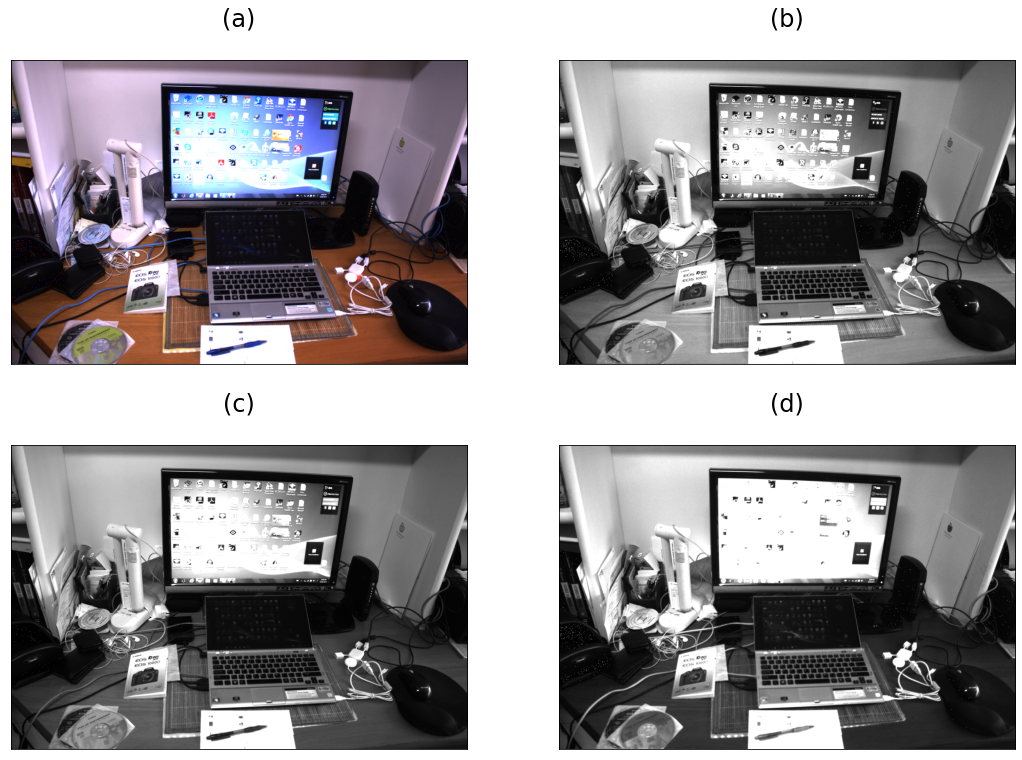

In [11]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(image_demosaicing)
axs[0][1].imshow(image_demosaicing[:,:,0], cmap = 'gray')
axs[1][0].imshow(image_demosaicing[:,:,1], cmap = 'gray')
axs[1][1].imshow(image_demosaicing[:,:,2], cmap = 'gray')

titles = [['(a)\n', '(b)\n'], ['(c)\n', '(d)\n']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig('Images/image_demosaicing.png');

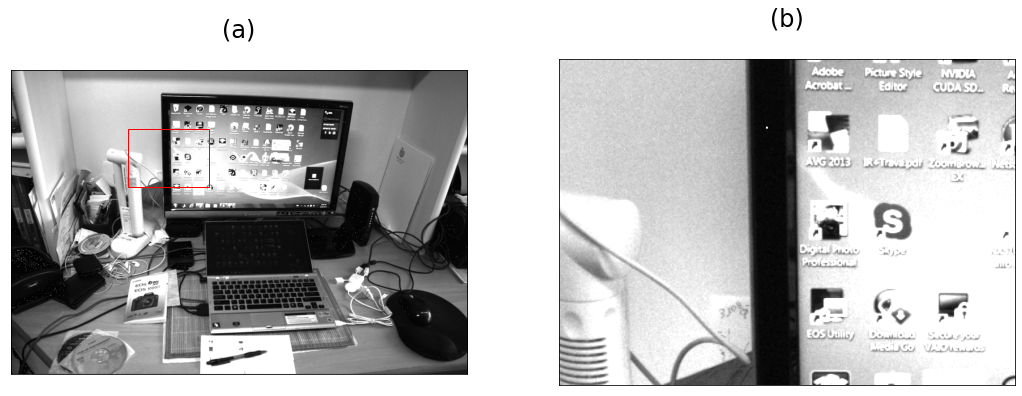

In [12]:
fig, axs = plt.subplots(1,2, figsize = (18,6))

axs[0].imshow(image_demosaicing[:,:,0], cmap = 'gray')

rect = patches.Rectangle((1000, 500), 700, 500, 
                         linewidth=1, 
                         edgecolor='r', 
                         facecolor='none')

axs[0].add_patch(rect)

axs[1].imshow(image_demosaicing[500:1000,1000:1700,0], cmap = 'gray')

titles = ['(a)\n', '(b)\n']

for ax, title in zip(axs,titles):
        
    # Set title
        
    ax.set_title(title, fontsize = 24)
        
    # Remove axis
        
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    
plt.savefig('Images/image_demosaicing_zoom.png');

## White Balance

In [13]:
image_with_white_balance = automatic_white_balance(
    image_demosaicing).astype(int)

## Plotting image with White Balance

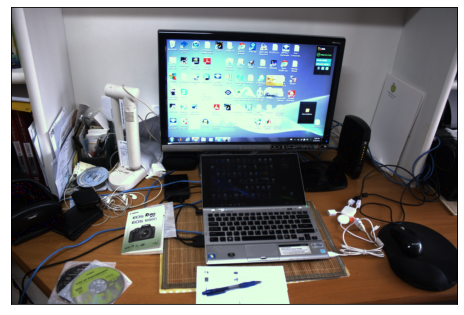

In [14]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(image_with_white_balance)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig('Images/white_balance.png')

## Gamma correction

In [15]:
image_with_gamma_correction = gamma_correction(
    image = image_with_white_balance, gamma = gamma).astype(int)

## Plotting image with gamma correction

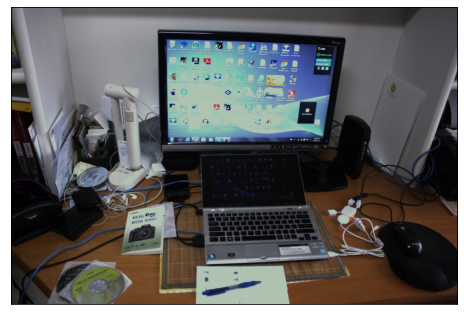

In [16]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(image_with_gamma_correction)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig('Images/gamma_correction.png')